In [221]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
# from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
import basicfunc as bbb

importlib.reload(bbb)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\imaging\\basicfunc.py'>

In [222]:
k = 2

# calibrazione

In [223]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [224]:
a = np.asarray(D1['Data_R;1']['Board'].array())
for i in range(len(a)):
    if a[i] != 0:
        print(a[i])

In [225]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


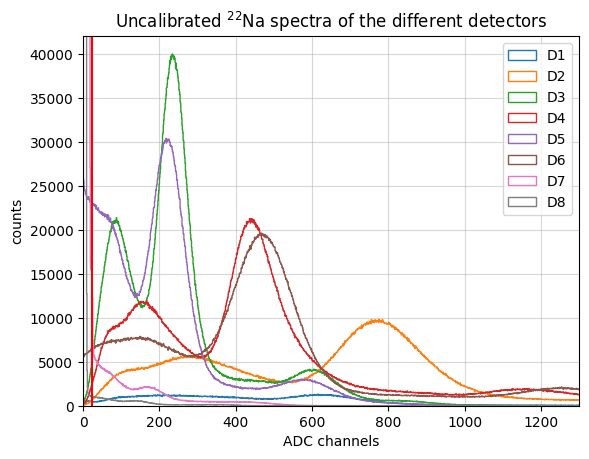

In [226]:
plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.axvline(x=22.5, color='red')
# plt.axvline(x=50, color='red')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 42000)
plt.xlim(0, 1300)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/uncalibrated_spectra.pdf',  format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [227]:
print('D1 \nCompton')
# d1normCom = bbb.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2)
print('Primo picco:')
d1norm1 = bbb.normal(d1, xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=k)
print('Secondo picco:')
d1norm2 = bbb.normal(d1, xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bbb.normal(d2, xmin=600, xmax=950, x1=0, x2=3000, b=int(d2.max()), n=k)
print('Secondo picco')
d2norm2 = bbb.normal(d2,  xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d2.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bbb.normal(d3, xmin=170, xmax=300, x1=0, x2=3000, b=int(d3.max()), n=k)
print('Secondo picco')
d3norm2 = bbb.normal(d3, xmin=520, xmax=700, x1=0, x2=3000, b=int(d3.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bbb.normal(d4, xmin=320, xmax=570, x1=0, x2=3000, b=int(d4.max()), n=k)
print('Secondo picco')
d4norm2 = bbb.normal(d4, xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d4.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bbb.normal(d5, xmin=150, xmax=300, x1=0, x2=3000, b=int(d5.max()), n=k)
print('Secondo picco')
d5norm2 = bbb.normal(d5, xmin=480, xmax=680, x1=0, x2=3000, b=int(d5.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D6 \nPrimo picco')
d6norm1 = bbb.normal(d6, xmin=350, xmax=580, x1=0, x2=3000, b=int(d6.max()), n=k)
print('Secondo picco')
d6norm2 = bbb.normal(d6, xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d6.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D7 \nPrimo picco')
d7norm1 = bbb.normal(d7, xmin=140, xmax=200, x1=200, x2=300, b=int(d7.max()), n=k)
print('Secondo picco')
d7norm2 = bbb.normal(d7, xmin=400, xmax=550, x1=350, x2=700, b=int(d7.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D8 \nPrimo picco')
d8norm1 = bbb.normal(d8, xmin=110, xmax=200, x1=50, x2=250, b=int(d8.max()), n=k)
print('Secondo picco')
d8norm2 = bbb.normal(d8, xmin=300, xmax=450, x1=200, x2=500, b=int(d8.max()), n=k)

D1 
Compton
Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 338109.3599060629 ± 1905.151088414951
Media = 616.0207899885756 ± 0.4835257283466749
Sigma = 110.79018891855962 ± 0.8060963475372384
Chi-quadro = 357.134863942679
Chi-quadro ridotto = 1.445890137419753
Integrale dell'istogramma nel range [394.44041215145637, 837.6011678256949] = 371889 ± 609
Secondo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43765.79421203449 ± 299.57369506237745
Media = 1624.6067070564497 ± 1.2564103943678144
Sigma = 168.99294309209205 ± 1.4516617266924874
Chi-quadro = 662.171225457022
Chi-quadro ridotto = 1.1091645317538057
Integrale dell'istogramma nel range [1286.6208208722655, 1962.592593240634] = 44017 ± 209
______________________________________________________________________________________________________________
D2 
Primo picco
Parametri ottimizzati:
-----------------------------------------------
Ampiezza =

In [228]:
y_calib = np.array([511, 1275]) #KeV
#__________________________________________________________________________________________________________
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bbb.linear_regression(xD1, y_calib, sx=sxD1, sy = None)
print('__________________________________________________________________________________________________________')
xD2 = np.array([d2norm1[0][1], d2norm2[0][1]])
sxD2 = np.array([d2norm1[1][1], d2norm2[1][1],])
calibrazioneD2 = bbb.linear_regression(xD2, y_calib, sx=sxD2, sy = None)
print('__________________________________________________________________________________________________________')
xD3 = np.array([d3norm1[0][1], d3norm2[0][1]])
sxD3 = np.array([d3norm1[1][1], d3norm2[1][1],])
calibrazioneD3 = bbb.linear_regression(xD3, y_calib, sx=sxD3, sy = None)
print('__________________________________________________________________________________________________________')
xD4 = np.array([d4norm1[0][1], d4norm2[0][1]])
sxD4 = np.array([d4norm1[1][1], d4norm2[1][1],])
calibrazioneD4 = bbb.linear_regression(xD4, y_calib, sx=sxD4, sy = None)
print('__________________________________________________________________________________________________________')
xD5 = np.array([d5norm1[0][1], d5norm2[0][1]])
sxD5 = np.array([d5norm1[1][1], d5norm2[1][1],])
calibrazioneD5 = bbb.linear_regression(xD5, y_calib, sx=sxD5, sy = None)
print('__________________________________________________________________________________________________________')
xD6 = np.array([d6norm1[0][1], d6norm2[0][1]])
sxD6 = np.array([d6norm1[1][1], d6norm2[1][1],])
calibrazioneD6 = bbb.linear_regression(xD6, y_calib, sx=sxD6, sy = None)
print('__________________________________________________________________________________________________________')
xD7 = np.array([d7norm1[0][1], d7norm2[0][1]])
sxD7 = np.array([d7norm1[1][1], d7norm2[1][1],])
calibrazioneD7 = bbb.linear_regression(xD7, y_calib, sx=sxD7, sy = None)
print('__________________________________________________________________________________________________________')
xD8 = np.array([d8norm1[0][1], d8norm2[0][1]])
sxD8 = np.array([d8norm1[1][1], d8norm2[1][1],])
calibrazioneD8 = bbb.linear_regression(xD8, y_calib, sx=sxD8, sy = None)


Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.7574962004433666 ± 0.0015822020251721697
Intercetta (q) = 44.36659218904066 ± 1.0350907569265246
Chi-squared= 1.5369234634999633e-18
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.631641346893913 ± 0.0003609030711236539
Intercetta (q) = 22.201632035585305 ± 0.28713120187355545
Chi-squared= 5.705489716034212e-17
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.121317450816527 ± 0.00027138444246053875
Intercetta (q) = 11.822421778864964 ± 0.06852605098058366
Chi-squared= 3.642388148156892e-17
Non ha senso calcolare il chi2 r

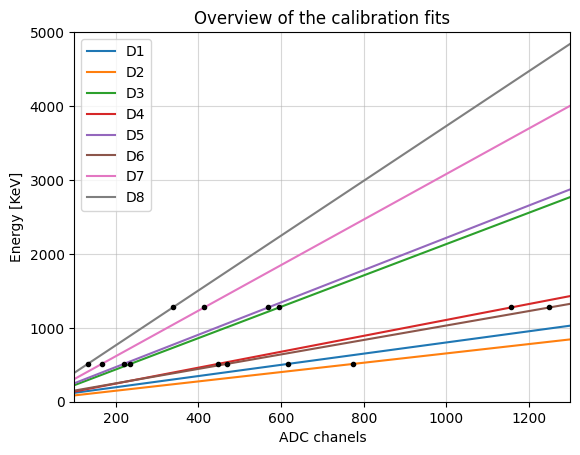

In [229]:
# Lista degli array
arr_x = [xD1, xD2, xD3, xD4, xD5, xD6, xD7, xD8]
arr_sx = [sxD1, sxD2, sxD3, sxD4, sxD5, sxD6, sxD7, sxD8]
arr_y = [y_calib, y_calib, y_calib, y_calib, y_calib, y_calib, y_calib, y_calib]
# Creazione del nuovo array
x = np.array([elem for arr in arr_x for elem in arr])
sx = np.array([elem for arr in arr_sx for elem in arr])
y = np.array([elem for arr in arr_y for elem in arr])
x_fit = np.linspace(0, 2100, 1000)
# plt.figure(figsize=(7, 5))
plt.errorbar(x, y, xerr=sx, fmt='o', color='black', markersize=3, capsize=1.5)
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD1[0], calibrazioneD1[1]), label='D1')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD2[0], calibrazioneD2[1]), label='D2')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD3[0], calibrazioneD3[1]), label='D3')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD4[0], calibrazioneD4[1]), label='D4')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD5[0], calibrazioneD5[1]), label='D5')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD6[0], calibrazioneD6[1]), label='D6')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD7[0], calibrazioneD7[1]), label='D7')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD8[0], calibrazioneD8[1]), label='D8')
plt.title('Overview of the calibration fits')
plt.xlabel('ADC chanels')
plt.ylabel('Energy [KeV]')
plt.ylim(0, 5000)
plt.xlim(100, 1300)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/calib_fit_tutti.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 262101.73808004783 ± 2636.52176412058
Media = 510.18298408947294 ± 0.9198937944781685
Sigma = 85.74907504026275 ± 0.823667587646722
Chi-quadro = 354.5485572688075
Chi-quadro ridotto = 1.5087172649736489
Integrale dell'istogramma nel range [338.6848340089474, 681.6811341699985] = 377341 ± 614


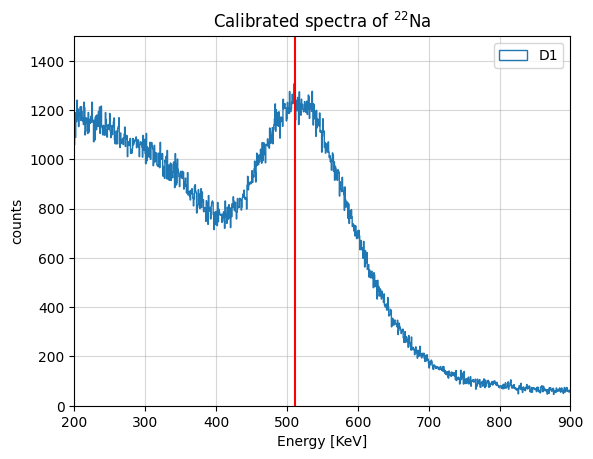

In [230]:
d1_calib = d1*calibrazioneD1[0]+calibrazioneD1[1]
print('Primo picco:')
d1_calibb_norm1 = bbb.normal(d1_calib, xmin=480, xmax=660, x1=0, x2=3000, b=int(d1.max()), n=k)

plt.hist(d1_calib, bins=int(d1.max()), histtype='step', label='D1')
plt.axvline(x=511, color='red')
plt.axvline(x=1275, color='red')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 1500)
plt.xlim(200, 900)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

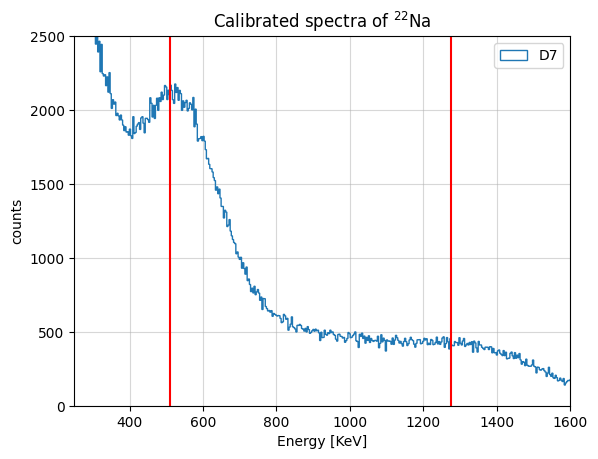

In [231]:
d7_calib = d7*calibrazioneD7[0]+calibrazioneD7[1]
plt.hist(d7_calib, bins=int(d1.max()), histtype='step', label='D7')
plt.axvline(x=511, color='red')
plt.axvline(x=1275, color='red')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 2500)
plt.xlim(250, 1600)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# samples

In [232]:
l = 250 #mm
h = 15 #mm
g = 5 #mm
# s = np.array([5*h/2+3*g, 3*h/2+2*g, h/2+g, -h/2, -3*h/2+g, -5*h/2-2*g, -7*h/2-3*g]) #allineamento con d5
s = np.array([5*g+9*h/2, 4*g+7*h/2, 3*g+5*h/2, 2*g+3*h/2, g+h/2, -h/2, -g-3*h/2]) #allineamento a d7
theta_max = []
theta_min = []
for i in range(7):
    theta_max.append(np.arctan((s[i]+h)/l))
    theta_min.append(np.arctan(s[i]/l))
theta_max = np.array(theta_max)
theta_min = np.array(theta_min)
x0_lead = 4.5 #mm
x0_pol = 20 #mm
x0_alu = 20 #mm
x0_iron = 10 #mm
x0_graph = 20 #mm 
x_eff_lead = x0_lead/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_pol = x0_pol/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_alu = x0_alu/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_iron = x0_iron/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_graph= x0_graph/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))

## HOME

In [233]:
home_d1 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_781_group23_home_30min.root')
home_d2 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_781_group23_home_30min.root')
home_d3 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_781_group23_home_30min.root')
home_d4 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_781_group23_home_30min.root')
home_d5 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_467_group23_home_30min.root')
home_d6 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_467_group23_home_30min.root')
home_d7 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_467_group23_home_30min.root')
home_d8 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_467_group23_home_30min.root')
hm_d1 = np.asarray(home_d1['Data_R;1']['Energy'].array())
hm_d1_calib = hm_d1 * calibrazioneD1[0] + calibrazioneD1[1]
hm_d1_def = hm_d1_calib[hm_d1_calib != 0]

hm_d2 = np.asarray(home_d2['Data_R;1']['Energy'].array())
hm_d2_calib = hm_d2 * calibrazioneD2[0] + calibrazioneD2[1]
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]

hm_d3 = np.asarray(home_d3['Data_R;1']['Energy'].array())
hm_d3_calib = hm_d3 * calibrazioneD3[0] + calibrazioneD3[1]
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]

hm_d4 = np.asarray(home_d4['Data_R;1']['Energy'].array())
hm_d4_calib = hm_d4 * calibrazioneD4[0] + calibrazioneD4[1]
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]

hm_d5 = np.asarray(home_d5['Data_R;1']['Energy'].array())
hm_d5_calib = hm_d5 * calibrazioneD5[0] + calibrazioneD5[1]
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]

hm_d6 = np.asarray(home_d6['Data_R;1']['Energy'].array())
hm_d6_calib = hm_d6 * calibrazioneD6[0] + calibrazioneD6[1]
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]

hm_d7 = np.asarray(home_d7['Data_R;1']['Energy'].array())
hm_d7_calib = hm_d7 * calibrazioneD7[0] + calibrazioneD7[1]
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]

hm_d8 = np.asarray(home_d8['Data_R;1']['Energy'].array())
hm_d8_calib = hm_d8 * calibrazioneD8[0] + calibrazioneD8[1]
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]


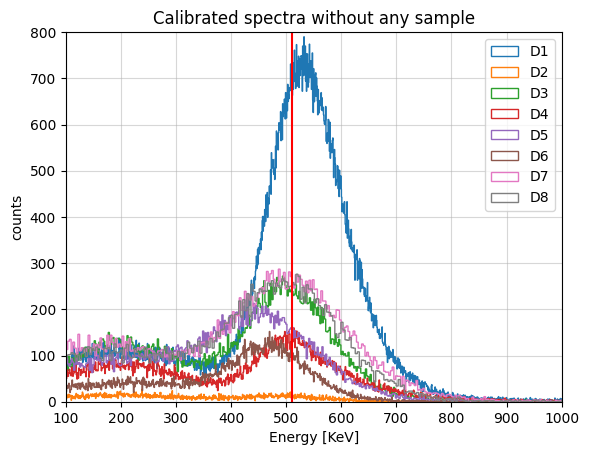

In [234]:
plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label='D1')
plt.hist(hm_d2_def, bins=int(hm_d2.max()), histtype='step', label='D2')
plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='D3')
plt.hist(hm_d4_def, bins=int(hm_d4.max()), histtype='step', label='D4')
plt.hist(hm_d5_def, bins=int(hm_d5.max()), histtype='step', label='D5')
plt.hist(hm_d6_def, bins=int(hm_d6.max()), histtype='step', label='D6')
plt.hist(hm_d7_def, bins=int(hm_d7.max()), histtype='step', label='D7')
plt.hist(hm_d8_def, bins=int(hm_d8.max()), histtype='step', label='D8')
plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra without any sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 800)
plt.xlim(100, 1000)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calib_home.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [235]:
fit_hm_d1 = bbb.normal(hm_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(hm_d1_def.max()/10), n=k)
fit_hm_d2 = bbb.normal(hm_d2_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d2_def.max()/10), n=k)
fit_hm_d3 = bbb.normal(hm_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(hm_d3_def.max()/10), n=k)
fit_hm_d4 = bbb.normal(hm_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(hm_d4_def.max()/10), n=k)
fit_hm_d5 = bbb.normal(hm_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(hm_d5_def.max()/10), n=k)
fit_hm_d6 = bbb.normal(hm_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d6_def.max()/10), n=k)
fit_hm_d7 = bbb.normal(hm_d7_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d7_def.max()/10), n=k)
fit_hm_d8 = bbb.normal(hm_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(hm_d8_def.max()/10), n=k)

#integrals dal det2 al det6
hm_int = np.array([fit_hm_d2[5][0], fit_hm_d3[5][0], fit_hm_d4[5][0], fit_hm_d5[5][0], fit_hm_d6[5][0], fit_hm_d7[5][0], fit_hm_d8[5][0]])
hm_int_err = np.array([fit_hm_d2[5][1], fit_hm_d3[5][1], fit_hm_d4[5][1], fit_hm_d5[5][1], fit_hm_d6[5][1], fit_hm_d7[5][1], fit_hm_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1612621.0065103008 ± 20039.73710071498
Media = 534.7886158739352 ± 0.9471695547635939
Sigma = 68.54831610044945 ± 1.0424603162985209
Chi-quadro = 530.9038288623824
Chi-quadro ridotto = 22.120992869265933
Integrale dell'istogramma nel range [397.6919836730363, 671.8852480748342] = 157011 ± 396
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41630.99035785379 ± 1788.9009217306852
Media = 482.8124325119869 ± 3.0666340557442484
Sigma = 84.32704768872586 ± 4.631234016107298
Chi-quadro = 20.65011634940071
Chi-quadro ridotto = 1.214712726435336
Integrale dell'istogramma nel range [314.1583371345352, 651.4665278894386] = 4629 ± 68
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 242423.85700167003 ± 7042.565848576224
Media = 497.10987167269326 ± 2.5792018558076304
Sigma = 83.9649609834854 ± 3.109109067541866
Chi-quadro = 252.93307697543435
Chi-qua

## PIOMBO

In [236]:
piombo_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [237]:
pb_d1 = np.asarray(piombo_d1['Data_R;1']['Energy'].array())
pb_d1_calib = pb_d1*calibrazioneD1[0]+calibrazioneD1[1]
pb_d1_def = pb_d1_calib[pb_d1_calib != 0]

pb_d2 = np.asarray(piombo_d2['Data_R;1']['Energy'].array())
pb_d2_calib = pb_d2*calibrazioneD2[0]+calibrazioneD2[1]
pb_d2_def = pb_d2_calib[pb_d2_calib != 0]

pb_d3 = np.asarray(piombo_d3['Data_R;1']['Energy'].array())
pb_d3_calib = pb_d3 * calibrazioneD3[0] + calibrazioneD3[1]
pb_d3_def = pb_d3_calib[pb_d3_calib != 0]

pb_d4 = np.asarray(piombo_d4['Data_R;1']['Energy'].array())
pb_d4_calib = pb_d4 * calibrazioneD4[0] + calibrazioneD4[1]
pb_d4_def = pb_d4_calib[pb_d4_calib != 0]

pb_d5 = np.asarray(piombo_d5['Data_R;1']['Energy'].array())
pb_d5_calib = pb_d5 * calibrazioneD5[0] + calibrazioneD5[1]
pb_d5_def = pb_d5_calib[pb_d5_calib != 0]

pb_d6 = np.asarray(piombo_d6['Data_R;1']['Energy'].array())
pb_d6_calib = pb_d6 * calibrazioneD6[0] + calibrazioneD6[1]
pb_d6_def = pb_d6_calib[pb_d6_calib != 0]

pb_d7 = np.asarray(piombo_d7['Data_R;1']['Energy'].array())
pb_d7_calib = pb_d7 * calibrazioneD7[0] + calibrazioneD7[1]
pb_d7_def = pb_d7_calib[pb_d7_calib != 0]

pb_d8 = np.asarray(piombo_d8['Data_R;1']['Energy'].array())
pb_d8_calib = pb_d8 * calibrazioneD8[0] + calibrazioneD8[1]
pb_d8_def = pb_d8_calib[pb_d8_calib != 0]

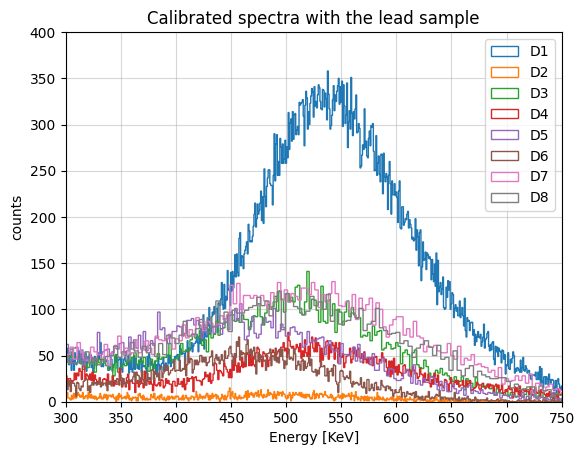

In [238]:
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label='D1')
plt.hist(pb_d2_def, bins=int(pb_d2.max()), histtype='step', label='D2')
plt.hist(pb_d3_def, bins=int(pb_d3.max()), histtype='step', label='D3')
plt.hist(pb_d4_def, bins=int(pb_d4.max()), histtype='step', label='D4')
plt.hist(pb_d5_def, bins=int(pb_d5.max()), histtype='step', label='D5')
plt.hist(pb_d6_def, bins=int(pb_d6.max()), histtype='step', label='D6')
plt.hist(pb_d7_def, bins=int(pb_d7.max()), histtype='step', label='D7')
plt.hist(pb_d8_def, bins=int(pb_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the lead sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 400)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_lead.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [239]:
fit_pb_d1 = bbb.normal(pb_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(pb_d1_def.max()/10), n=k)
fit_pb_d2 = bbb.normal(pb_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(pb_d2_def.max()/10), n=k)
fit_pb_d3 = bbb.normal(pb_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(pb_d3_def.max()/10), n=k)
fit_pb_d4 = bbb.normal(pb_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(pb_d4_def.max()/10), n=k)
fit_pb_d5 = bbb.normal(pb_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(pb_d5_def.max()/10), n=k)
fit_pb_d6 = bbb.normal(pb_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(pb_d6_def.max()/10), n=k)
fit_pb_d7 = bbb.normal(pb_d7_def, xmin=410, xmax=620, x1=0, x2=1000, b=int(pb_d7_def.max()/10), n=k)
fit_pb_d8 = bbb.normal(pb_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(pb_d8_def.max()/10), n=k)

#integrals dal det2 al det8
pb_int = np.array([fit_pb_d2[5][0], fit_pb_d3[5][0], fit_pb_d4[5][0], fit_pb_d5[5][0], fit_pb_d6[5][0], fit_pb_d7[5][0], fit_pb_d8[5][0]])
pb_int_err = np.array([fit_pb_d2[5][1], fit_pb_d3[5][1], fit_pb_d4[5][1], fit_pb_d5[5][1], fit_pb_d6[5][1], fit_pb_d7[5][1], fit_pb_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 737353.6534332427 ± 9001.702040544018
Media = 540.7054064306845 ± 0.9369330363576598
Sigma = 69.21224419123274 ± 1.037630952494925
Chi-quadro = 208.9169026182588
Chi-quadro ridotto = 8.70487094242745
Integrale dell'istogramma nel range [402.28091804821906, 679.12989481315] = 71615 ± 267
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 23449.92899420721 ± 1078.626918928082
Media = 487.70849646835467 ± 3.431935251369109
Sigma = 82.75213625704949 ± 5.010787956618215
Chi-quadro = 26.06781686700461
Chi-quadro ridotto = 1.3719903614212952
Integrale dell'istogramma nel range [322.20422395425567, 653.2127689824537] = 2526 ± 50
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 108946.06697312849 ± 4110.58404457172
Media = 503.57496065973834 ± 3.391883357915347
Sigma = 86.20868200812997 ± 4.17436188040077
Chi-quadro = 180.6814453633857
Chi-quadro rido

In [240]:
#CALCOLO COEFFICIENTE ATTENUAZIONE PIOMBO
rho_pb = 0.01135 #g/mm^3
mu_pb = -(np.log(pb_int/hm_int))/(x_eff_lead*rho_pb) #mm^2/g
mu_pb_err = np.sqrt((pb_int_err/pb_int)**2 + (hm_int_err/hm_int)**2)/(x_eff_lead*rho_pb)

#compatibilità tra di loro
pb_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_pb)):
    for j in range(len(mu_pb)):
        if j == i:
            pb_compat_crossed[i, j] = ''
        else:
            pb_compat_crossed[i, j] = np.abs(mu_pb[i]-mu_pb[j])/np.sqrt(mu_pb_err[i]**2 + mu_pb_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(pb_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_pb = 16.14 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
pb_compat = np.abs(mu_pb-mu_atteso_pb)/mu_pb_err
print('\n')
for i in range(len(mu_pb)):
    print(f'mu{i+2} = {mu_pb[i]:.2f} ± {mu_pb_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pb_compat[i]}')
print('\n')
# for i in range(len(mu_pb)):
#         print(f'mu{i+2} = {10 * rho_pb * mu_pb[i]:.4f} ± {10 * rho_pb * mu_pb_err[i]:.4f} cm^(-1)')


           d2        d3        d4        d5        d6         d7        d8
d2             7.508443  7.930395  8.260137  9.721675  10.802655  9.502736
d3   7.508443            0.751694  1.240318  3.695191   5.410719  3.518986
d4   7.930395  0.751694             0.47273  2.917375   4.603565  2.794368
d5   8.260137  1.240318   0.47273            2.485743    4.18787   2.38688
d6   9.721675  3.695191  2.917375  2.485743             1.636392  0.055862
d7  10.802655  5.410719  4.603565   4.18787  1.636392             1.481937
d8   9.502736  3.518986  2.794368   2.38688  0.055862   1.481937          


mu2 = 11.01 ± 0.45 mm^2/g 	 compatibilità con il valore atteso: 11.447820344446766
mu3 = 14.74 ± 0.22 mm^2/g 	 compatibilità con il valore atteso: 6.4723006642223995
mu4 = 14.98 ± 0.22 mm^2/g 	 compatibilità con il valore atteso: 5.232871264334009
mu5 = 15.12 ± 0.22 mm^2/g 	 compatibilità con il valore atteso: 4.675770979418074
mu6 = 15.91 ± 0.23 mm^2/g 	 compatibilità con il valore atteso: 0.98

In [241]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_pb = 0
somma_pb_err = 0
for i in range(1, len(mu_pb)):
    somma_pb += mu_pb[i]/mu_pb_err[i]**2
    somma_pb_err +=1/mu_pb_err[i]**2

mu_pb_fin = somma_pb/somma_pb_err
mu_pb_err_fin = np.sqrt(1/somma_pb_err)

print(f'mu pesato piombo = {mu_pb_fin:.2f} più o meno {mu_pb_err_fin:.2f}')


mu pesato piombo = 15.48 più o meno 0.09


## POLIETILENE (maybe PMMA)

In [242]:
polyeth_d1 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d2 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d3 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d4 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d5 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d6 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d7 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d8 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')

In [243]:
poly_d1 = np.asarray(polyeth_d1['Data_R;1']['Energy'].array())
poly_d1_calib = poly_d1*calibrazioneD1[0]+calibrazioneD1[1]
poly_d1_def = poly_d1_calib[poly_d1_calib != 0]

poly_d2 = np.asarray(polyeth_d2['Data_R;1']['Energy'].array())
poly_d2_calib = poly_d2*calibrazioneD2[0]+calibrazioneD2[1]
poly_d2_def = poly_d2_calib[poly_d2_calib != 0]

poly_d3 = np.asarray(polyeth_d3['Data_R;1']['Energy'].array())
poly_d3_calib = poly_d3 * calibrazioneD3[0] + calibrazioneD3[1]
poly_d3_def = poly_d3_calib[poly_d3_calib != 0]

poly_d4 = np.asarray(polyeth_d4['Data_R;1']['Energy'].array())
poly_d4_calib = poly_d4 * calibrazioneD4[0] + calibrazioneD4[1]
poly_d4_def = poly_d4_calib[poly_d4_calib != 0]

poly_d5 = np.asarray(polyeth_d5['Data_R;1']['Energy'].array())
poly_d5_calib = poly_d5 * calibrazioneD5[0] + calibrazioneD5[1]
poly_d5_def = poly_d5_calib[poly_d5_calib != 0]

poly_d6 = np.asarray(polyeth_d6['Data_R;1']['Energy'].array())
poly_d6_calib = poly_d6 * calibrazioneD6[0] + calibrazioneD6[1]
poly_d6_def = poly_d6_calib[poly_d6_calib != 0]

poly_d7 = np.asarray(polyeth_d7['Data_R;1']['Energy'].array())
poly_d7_calib = poly_d7 * calibrazioneD7[0] + calibrazioneD7[1]
poly_d7_def = poly_d7_calib[poly_d7_calib != 0]

poly_d8 = np.asarray(polyeth_d8['Data_R;1']['Energy'].array())
poly_d8_calib = poly_d8 * calibrazioneD8[0] + calibrazioneD8[1]
poly_d8_def = poly_d8_calib[poly_d8_calib != 0]

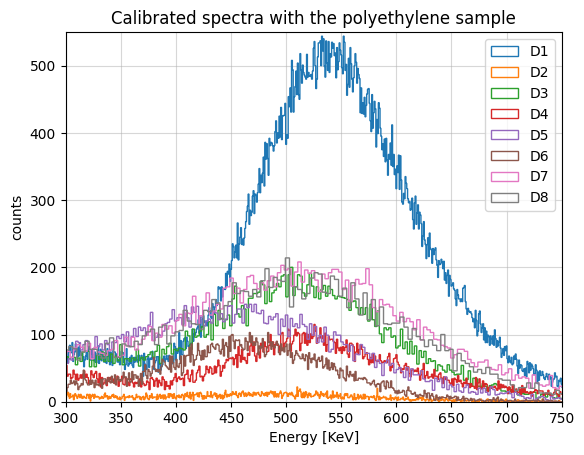

In [244]:
plt.hist(poly_d1_def, bins=int(poly_d1.max()), histtype='step', label='D1')
plt.hist(poly_d2_def, bins=int(poly_d2.max()), histtype='step', label='D2')
plt.hist(poly_d3_def, bins=int(poly_d3.max()), histtype='step', label='D3')
plt.hist(poly_d4_def, bins=int(poly_d4.max()), histtype='step', label='D4')
plt.hist(poly_d5_def, bins=int(poly_d5.max()), histtype='step', label='D5')
plt.hist(poly_d6_def, bins=int(poly_d6.max()), histtype='step', label='D6')
plt.hist(poly_d7_def, bins=int(poly_d7.max()), histtype='step', label='D7')
plt.hist(poly_d8_def, bins=int(poly_d8.max()), histtype='step', label='D8')
# plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra with the polyethylene sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 550)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_poly.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [245]:
print('Detector D1: ------------------ ')
fit_poly_d1 = bbb.normal(poly_d1_def, xmin=500, xmax=660, x1=0, x2=1000, b=int(poly_d1_def.max()/10), n=k)
print('Detector D2: ------------------ ')
fit_poly_d2 = bbb.normal(poly_d2_def, xmin=380, xmax=640, x1=0, x2=1000, b=int(poly_d2_def.max()/10), n=k)
print('Detector D3: ------------------ ')
fit_poly_d3 = bbb.normal(poly_d3_def, xmin=450, xmax=700, x1=0, x2=1000, b=int(poly_d3_def.max()/10), n=k)
print('Detector D4: ------------------ ')
fit_poly_d4 = bbb.normal(poly_d4_def, xmin=450, xmax=680, x1=0, x2=1000, b=int(poly_d4_def.max()/10), n=k)
print('Detector D5: ------------------ ')
fit_poly_d5 = bbb.normal(poly_d5_def, xmin=380, xmax=680, x1=0, x2=1000, b=int(poly_d5_def.max()/10), n=k)
print('Detector D6: ------------------ ')
fit_poly_d6 = bbb.normal(poly_d6_def, xmin=430, xmax=600, x1=0, x2=1000, b=int(poly_d6_def.max()/10), n=k)
print('Detector D7: ------------------ ')
fit_poly_d7 = bbb.normal(poly_d7_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(poly_d7_def.max()/10), n=k)
print('Detector D8: ------------------ ')
fit_poly_d8 = bbb.normal(poly_d8_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(poly_d8_def.max()/10), n=k)

#integrals dal det2 al det8
poly_int = np.array([fit_poly_d2[5][0], fit_poly_d3[5][0], fit_poly_d4[5][0], fit_poly_d5[5][0], fit_poly_d6[5][0], fit_poly_d7[5][0], fit_poly_d8[5][0]])
poly_int_err = np.array([fit_poly_d2[5][1], fit_poly_d3[5][1], fit_poly_d4[5][1], fit_poly_d5[5][1], fit_poly_d6[5][1], fit_poly_d7[5][1], fit_poly_d8[5][1]])

Detector D1: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1244353.0630152493 ± 38270.040809450256
Media = 535.4605631991562 ± 2.3119788473141782
Sigma = 74.62959516389377 ± 2.4071808530642334
Chi-quadro = 87.47236635462187
Chi-quadro ridotto = 6.7286435657401436
Integrale dell'istogramma nel range [386.2013728713687, 684.7197535269438] = 114609 ± 338
Detector D2: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41752.44974046509 ± 1285.1324520589076
Media = 479.04682222460093 ± 2.8264635451546454
Sigma = 92.7867493644322 ± 3.635019916043813
Chi-quadro = 26.324837992860463
Chi-quadro ridotto = 1.144558173602629
Integrale dell'istogramma nel range [293.4733234957365, 664.6203209534654] = 4564 ± 67
Detector D3: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 171695.59301358814 ± 8950.673624477819
Media = 509.1396575111749 ± 4.9

In [246]:
#CALCOLO COEFFICIENTE ATTENUAZIONE POLIETILENE
# rho_poly = 9.300E-04 #g/mm^3 Polietilene 
rho_poly = 1.190E-03 #g/mm^3 PMMA
mu_poly = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_poly) #mm^2/g
mu_poly_err = 1/(x_eff_pol*rho_poly) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
poly_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_poly)):
    for j in range(len(mu_poly)):
        if j == i:
            poly_compat_crossed[i, j] = ''
        else:
            poly_compat_crossed[i, j] = np.abs(mu_poly[i]-mu_poly[j])/np.sqrt(mu_poly_err[i]**2 + mu_poly_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(poly_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
# mu_atteso_poly = 9.947 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
mu_atteso_poly = 9.410 #mm^2/g PMMA
poly_compat = np.abs(mu_poly-mu_atteso_poly)/mu_poly_err
print('\n')
for i in range(len(mu_poly)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_poly[i]:.2f} ± {mu_poly_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {poly_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_poly[i]:.2f} ± {mu_poly_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {poly_compat[i]}')
print('\n')
print(f'mu atteso pmma = {mu_atteso_poly * 10 * rho_poly} cm^(-1)')
print('\n')
for i in range(len(mu_poly)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_poly * mu_poly[i]:.4f} ± {10 * rho_poly * mu_poly_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_poly * mu_poly[i]:.4f} ± {10 * rho_poly * mu_poly_err[i]:.4f} cm^(-1)')

           d2         d3         d4         d5         d6         d7        d8
d2             13.908367  12.341961  17.439099  15.003461  16.115835  16.43965
d3  13.908367              2.414482   5.721159   1.997613   3.688298  4.684038
d4  12.341961   2.414482              8.051721   4.319837   6.014668    6.8339
d5  17.439099   5.721159   8.051721              3.574113   1.951089  0.553126
d6  15.003461   1.997613   4.319837   3.574113              1.623657  2.746951
d7  16.115835   3.688298   6.014668   1.951089   1.623657             1.246261
d8   16.43965   4.684038     6.8339   0.553126   2.746951   1.246261          


mu2 = 00.55 ± 0.81 mm^2/g  	 compatibilità con il valore atteso: 10.934157950636152
mu3 = 13.12 ± 0.40 mm^2/g 	 compatibilità con il valore atteso: 9.269724657059372
mu4 = 11.74 ± 0.41 mm^2/g 	 compatibilità con il valore atteso: 5.7282528497491105
mu5 = 16.41 ± 0.41 mm^2/g 	 compatibilità con il valore atteso: 16.95776777614132
mu6 = 14.29 ± 0.43 mm^2/g 	 compati

In [247]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_poly = 0
somma_poly_err = 0
for i in range(1, len(mu_poly)):
    somma_poly += mu_poly[i]/mu_poly_err[i]
    somma_poly_err +=1/mu_poly_err[i]

mu_poly_fin = somma_poly/somma_poly_err
mu_poly_err_fin = np.sqrt(1/somma_poly_err)

print(f'mu pesato polietilene = {mu_poly_fin:.2f} più o meno {mu_poly_err_fin:.2f}')

mu pesato polietilene = 14.42 più o meno 0.27


## home xdvr

In [248]:
m2 = 1.38
m3 = 4.49 
m4 = 2.27
m5 = 2.53
m6 = 1.10
m7 = 2.74
m8 = 3.67

q2 = 60.86
q3 = 66.08
q4 = 59.85
q5 = 40.46
q6 = 37.21
q7 = 56.43
q8 = 40.85

In [249]:
home= uproot.open('run_9_no_sample\\RAW\\DataR_run_9.root')
hm_en = np.asarray(home['Data_R;1']['Energy'].array())
hm_ch = np.asarray(home['Data_R;1']['Channel'].array())
hm_dg = np.asarray(home['Data_R;1']['Board'].array())

In [250]:
home_d1 = hm_en[(hm_dg == 0) & (hm_ch == 0)]
home_d2 = hm_en[(hm_dg == 0) & (hm_ch == 1)]
home_d3 = hm_en[(hm_dg == 0) & (hm_ch == 2)]
home_d4 = hm_en[(hm_dg == 0) & (hm_ch == 3)]
home_d5 = hm_en[(hm_dg == 1) & (hm_ch == 0)]
home_d6 = hm_en[(hm_dg == 1) & (hm_ch == 1)]
home_d7 = hm_en[(hm_dg == 1) & (hm_ch == 2)]
home_d8 = hm_en[(hm_dg == 1) & (hm_ch == 3)]

In [251]:
hm_d2_calib = home_d1 * m2 + q2
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]
hm_d3_calib = home_d3 * m3 + q3
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]
hm_d4_calib = home_d4 * m4 + q4
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]
hm_d5_calib = home_d5 * m5 + q5
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]
hm_d6_calib = home_d6 * m6 + q6
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]
hm_d7_calib = home_d7 * m7 + q7
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]
hm_d8_calib = home_d8 * m8 + q8
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]

In [252]:
# fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/6), n=k)
fit_hm_d2 = bbb.normal(hm_d2_def, xmin=250, xmax=600, x1=0, x2=1000, b=int(hm_d2_def.max()/10), n=k)
fit_hm_d3 = bbb.normal(hm_d3_def, xmin=350, xmax=620, x1=0, x2=1000, b=int(hm_d3_def.max()/10), n=k)
fit_hm_d4 = bbb.normal(hm_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(hm_d4_def.max()/10), n=k)
fit_hm_d5 = bbb.normal(hm_d5_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d5_def.max()/10), n=k)
fit_hm_d6 = bbb.normal(hm_d6_def, xmin=350, xmax=550, x1=0, x2=1000, b=int(hm_d6_def.max()/10), n=k)
fit_hm_d7 = bbb.normal(hm_d7_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d7_def.max()/10), n=k)
fit_hm_d8 = bbb.normal(hm_d8_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d8_def.max()/10), n=k)

#integrals dal det2 al det8
home_int = np.array([fit_hm_d2[5][0], fit_hm_d3[5][0], fit_hm_d4[5][0], fit_hm_d5[5][0], fit_hm_d6[5][0], fit_hm_d7[5][0], fit_hm_d8[5][0]])
home_int_err = np.array([fit_hm_d2[5][1], fit_hm_d3[5][1], fit_hm_d4[5][1], fit_hm_d5[5][1], fit_hm_d6[5][1], fit_hm_d7[5][1], fit_hm_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 521700.3577146345 ± 8571.387797211642
Media = 391.6137791700974 ± 1.633527253748941
Sigma = 90.00353549184366 ± 1.8291445200214937
Chi-quadro = 283.5805310304991
Chi-quadro ridotto = 8.861891594703097
Integrale dell'istogramma nel range [211.6067081864101, 571.6208501537848] = 51527 ± 226
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 81229.30514575029 ± 9951.895075427841
Media = 472.5567186516292 ± 11.480080656460162
Sigma = 145.04042253171218 ± 22.11023707944744
Chi-quadro = 158.99988288413522
Chi-quadro ridotto = 6.359995315365409
Integrale dell'istogramma nel range [182.47587358820482, 762.6375637150536] = 8530 ± 92
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 60344.543156691165 ± 3277.982919590637
Media = 526.6502705935459 ± 4.6169448741057835
Sigma = 103.82043057453939 ± 7.370326072078531
Chi-quadro = 60.85971043259734
Chi-quadr

## ferro xdvr

In [253]:
ferro = uproot.open('run_11_iron\\RAW\\DataR_run_11.root')
energy = np.asarray(ferro['Data_R;1']['Energy'].array())
channels = np.asarray(ferro['Data_R;1']['Channel'].array())
board = np.asarray(ferro['Data_R;1']['Board'].array())

In [254]:
ferro_d1 = energy[(board == 0) & (channels == 0)]
ferro_d2 = energy[(board == 0) & (channels == 1)]
ferro_d3 = energy[(board == 0) & (channels == 2)]
ferro_d4 = energy[(board == 0) & (channels == 3)]
ferro_d5 = energy[(board == 1) & (channels == 0)]
ferro_d6 = energy[(board == 1) & (channels == 1)]
ferro_d7 = energy[(board == 1) & (channels == 2)]
ferro_d8 = energy[(board == 1) & (channels == 3)]

# modo più figo di farlo è
# grafite = {}
# for d in range(2):  # digit può essere 0 o 1
#     for c in range(4):  # canali può essere 0, 1, 2, 3
#         grafite[f"d{d+1}_c{c+1}"] = energia[(digit == d) & (canali == c)]
#
# grafite_d1 = grafite["d1_c1"]  # Energia per digit 0 e canale 0
# ......
# grafite_d8 = grafite["d2_c4"]  # Energia per digit 1 e canale 3

In [255]:
fe_d2_calib = ferro_d1 * m2 + q2
fe_d2_def = fe_d2_calib[fe_d2_calib != 0]

fe_d3_calib = ferro_d3 * m3 + q3
fe_d3_def = fe_d3_calib[fe_d3_calib != 0]

fe_d4_calib = ferro_d4 * m4 + q4
fe_d4_def = fe_d4_calib[fe_d4_calib != 0]

fe_d5_calib = ferro_d5 * m5 + q5
fe_d5_def = fe_d5_calib[fe_d5_calib != 0]

fe_d6_calib = ferro_d6 * m6 + q6
fe_d6_def = fe_d6_calib[fe_d6_calib != 0]

fe_d7_calib = ferro_d7 * m7 + q7
fe_d7_def = fe_d7_calib[fe_d7_calib != 0]

fe_d8_calib = ferro_d8 * m8 + q8
fe_d8_def = fe_d8_calib[fe_d8_calib != 0]

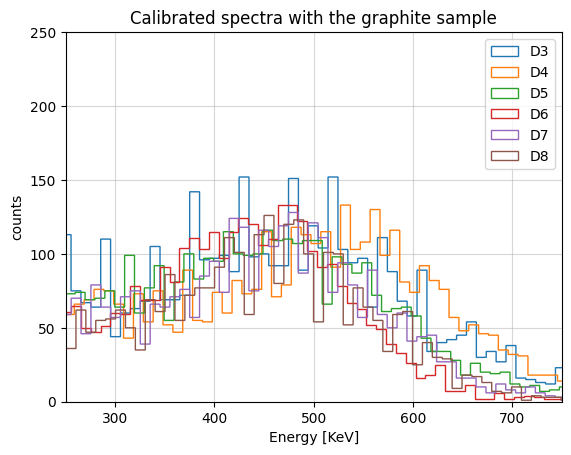

In [256]:
# plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label='D1')
# plt.hist(fe_d2_def, bins=int(fe_d2_def.max()/10), histtype='step', label='D2')
plt.hist(fe_d3_def, bins=int(fe_d3_def.max()/10), histtype='step', label='D3')
plt.hist(fe_d4_def, bins=int(fe_d4_def.max()/10), histtype='step', label='D4')
plt.hist(fe_d5_def, bins=int(fe_d5_def.max()/10), histtype='step', label='D5')
plt.hist(fe_d6_def, bins=int(fe_d6_def.max()/10), histtype='step', label='D6')
plt.hist(fe_d7_def, bins=int(fe_d7_def.max()/10), histtype='step', label='D7')
plt.hist(fe_d8_def, bins=int(fe_d8_def.max()/10), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the graphite sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 250)
plt.xlim(250, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_graphite.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [257]:
# fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/6), n=k)
fit_fe_d2 = bbb.normal(fe_d2_def, xmin=250, xmax=600, x1=0, x2=1000, b=int(fe_d2_def.max()/10), n=k)
fit_fe_d3 = bbb.normal(fe_d3_def, xmin=350, xmax=620, x1=0, x2=1000, b=int(fe_d3_def.max()/10), n=k)
fit_fe_d4 = bbb.normal(fe_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(fe_d4_def.max()/10), n=k)
fit_fe_d5 = bbb.normal(fe_d5_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(fe_d5_def.max()/10), n=k)
fit_fe_d6 = bbb.normal(fe_d6_def, xmin=350, xmax=550, x1=0, x2=1000, b=int(fe_d6_def.max()/10), n=k)
fit_fe_d7 = bbb.normal(fe_d7_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(fe_d7_def.max()/10), n=k)
fit_fe_d8 = bbb.normal(fe_d8_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(fe_d8_def.max()/10), n=k)

#integrals dal det2 al det8
iron_int = np.array([fit_fe_d2[5][0], fit_fe_d3[5][0], fit_fe_d4[5][0], fit_fe_d5[5][0], fit_fe_d6[5][0], fit_fe_d7[5][0], fit_fe_d8[5][0]])
iron_int_err = np.array([fit_fe_d2[5][1], fit_fe_d3[5][1], fit_fe_d4[5][1], fit_fe_d5[5][1], fit_fe_d6[5][1], fit_fe_d7[5][1], fit_fe_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 263429.02238129266 ± 4699.246221714262
Media = 385.8648964521593 ± 1.7695545065993665
Sigma = 89.87868144683513 ± 1.9872935151883675
Chi-quadro = 146.88041323341506
Chi-quadro ridotto = 4.5900129135442205
Integrale dell'istogramma nel range [206.10753355848905, 565.6222593458295] = 25902 ± 160
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 37298.60206232531 ± 4375.703874218234
Media = 469.8265967482757 ± 11.330889731754771
Sigma = 128.74738539505378 ± 19.26820888020357
Chi-quadro = 131.40198405241793
Chi-quadro ridotto = 5.256079362096717
Integrale dell'istogramma nel range [212.3318259581681, 727.3213675383832] = 4003 ± 63
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 31430.160310594096 ± 2376.6392942564407
Media = 526.8196066461849 ± 6.3808041133253015
Sigma = 111.37869799721362 ± 10.886552627044166
Chi-quadro = 50.822933337850095
Ch

In [258]:
#CALCOLO COEFFICIENTE ATTENUAZIONE FERRO
rho_iron = 7.874E-03 #g/mm^3
mu_iron = -(np.log(iron_int/home_int))/(x_eff_iron*rho_iron) #mm^2/g
mu_iron_err = 1/(x_eff_iron*rho_iron) * np.sqrt((iron_int_err/iron_int)**2 + (home_int_err/home_int)**2)

#compatibilità tra di loro
iron_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_iron)):
    for j in range(len(mu_iron)):
        if j == i:
            iron_compat_crossed[i, j] = ''
        else:
            iron_compat_crossed[i, j] = np.abs(mu_iron[i]-mu_iron[j])/np.sqrt(mu_iron_err[i]**2 + mu_iron_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(iron_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_iron = 8.414 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
# print('\n')
# print(f'mu_atteso (cm^(-1)) = {mu_atteso_iron * rho_iron * 10}')

iron_compat = np.abs(mu_iron-mu_atteso_iron)/mu_iron_err
print('\n')
for i in range(len(mu_iron)):
    if i == 0:
        print(f'mu{i+2} = {mu_iron[i]:.2f} ± {mu_iron_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {iron_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_iron[i]:.2f} ± {mu_iron_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {iron_compat[i]}')
print('\n')
for i in range(len(mu_iron)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_iron * mu_iron[i]:.4f} ± {10 * rho_iron * mu_iron_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_iron * mu_iron[i]:.4f} ± {10 * rho_iron * mu_iron_err[i]:.4f} cm^(-1)')

          d2        d3        d4        d5        d6        d7        d8
d2            4.205075  0.701987  3.250859  1.082705    3.4463  0.978344
d3  4.205075            2.399448    5.5712  1.975656  0.038018  1.970698
d4  0.701987  2.399448            2.928078   0.31964  2.134466  0.265135
d5  3.250859    5.5712  2.928078            3.158906   4.98734  3.032174
d6  1.082705  1.975656   0.31964  3.158906            1.763488  0.045377
d7    3.4463  0.038018  2.134466   4.98734  1.763488            1.768189
d8  0.978344  1.970698  0.265135  3.032174  0.045377  1.768189          


mu2 = 8.11 ± 0.09 mm^2/g  	 compatibilità con il valore atteso: 3.405139527777054
mu3 = 9.15 ± 0.23 mm^2/g 	 compatibilità con il valore atteso: 3.191001314112453
mu4 = 8.31 ± 0.27 mm^2/g 	 compatibilità con il valore atteso: 0.40527754312350944
mu5 = 7.22 ± 0.26 mm^2/g 	 compatibilità con il valore atteso: 4.620972427317638
mu6 = 8.43 ± 0.28 mm^2/g 	 compatibilità con il valore atteso: 0.05757983525967224
mu7 

In [259]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_iron = 0
somma_iron_err = 0
for i in range(1, len(mu_iron)):
    somma_iron += mu_iron[i]/mu_iron_err[i]
    somma_iron_err +=1/mu_iron_err[i]

mu_iron_fin = somma_iron/somma_iron_err
mu_iron_err_fin = np.sqrt(1/somma_iron_err)

print(f'mu pesato ferro = {mu_iron_fin:.2f} più o meno {mu_iron_err_fin:.2f}')

mu pesato ferro = 8.45 più o meno 0.21


## ALLUMINIO

In [260]:
alluminio_d1 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH0@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d2 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH1@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d3 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH2@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d4 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH3@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d5 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH0@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d6 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH1@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d7 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH2@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d8 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH3@DT5720B_467_group23__30min_lead_21000forward.root')

In [261]:
al_d1 = np.asarray(alluminio_d1['Data_R;1']['Energy'].array())
al_d1_calib = al_d1*calibrazioneD1[0]+calibrazioneD1[1]
al_d1_def = al_d1_calib[al_d1_calib != 0]

al_d2 = np.asarray(alluminio_d2['Data_R;1']['Energy'].array())
al_d2_calib = al_d2*calibrazioneD2[0]+calibrazioneD2[1]
al_d2_def = al_d2_calib[al_d2_calib != 0]

al_d3 = np.asarray(alluminio_d3['Data_R;1']['Energy'].array())
al_d3_calib = al_d3 * calibrazioneD3[0] + calibrazioneD3[1]
al_d3_def = al_d3_calib[al_d3_calib != 0]

al_d4 = np.asarray(alluminio_d4['Data_R;1']['Energy'].array())
al_d4_calib = al_d4 * calibrazioneD4[0] + calibrazioneD4[1]
al_d4_def = al_d4_calib[al_d4_calib != 0]

al_d5 = np.asarray(alluminio_d5['Data_R;1']['Energy'].array())
al_d5_calib = al_d5 * calibrazioneD5[0] + calibrazioneD5[1]
al_d5_def = al_d5_calib[al_d5_calib != 0]

al_d6 = np.asarray(alluminio_d6['Data_R;1']['Energy'].array())
al_d6_calib = al_d6 * calibrazioneD6[0] + calibrazioneD6[1]
al_d6_def = al_d6_calib[al_d6_calib != 0]

al_d7 = np.asarray(alluminio_d7['Data_R;1']['Energy'].array())
al_d7_calib = al_d7 * calibrazioneD7[0] + calibrazioneD7[1]
al_d7_def = al_d7_calib[al_d7_calib != 0]

al_d8 = np.asarray(alluminio_d8['Data_R;1']['Energy'].array())
al_d8_calib = al_d8 * calibrazioneD8[0] + calibrazioneD8[1]
al_d8_def = al_d8_calib[al_d8_calib != 0]


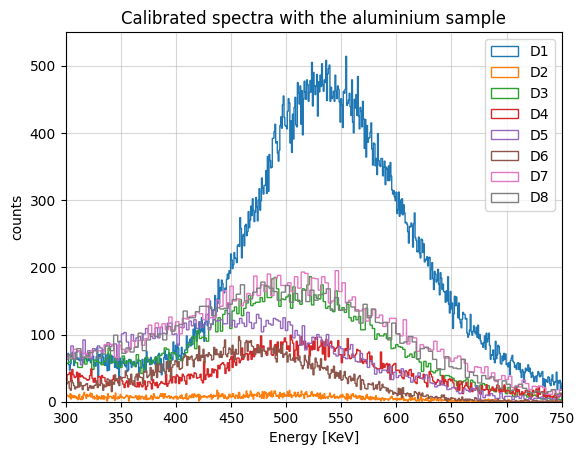

In [262]:
plt.hist(al_d1_def, bins=int(al_d1.max()), histtype='step', label='D1')
plt.hist(al_d2_def, bins=int(al_d2.max()), histtype='step', label='D2')
plt.hist(al_d3_def, bins=int(al_d3.max()), histtype='step', label='D3')
plt.hist(al_d4_def, bins=int(al_d4.max()), histtype='step', label='D4')
plt.hist(al_d5_def, bins=int(al_d5.max()), histtype='step', label='D5')
plt.hist(al_d6_def, bins=int(al_d6.max()), histtype='step', label='D6')
plt.hist(al_d7_def, bins=int(al_d7.max()), histtype='step', label='D7')
plt.hist(al_d8_def, bins=int(al_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the aluminium sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 550)
plt.xlim(300, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_aluminum.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [263]:
fit_al_d1 = bbb.normal(al_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(al_d1_def.max()/10), n=k)
fit_al_d2 = bbb.normal(al_d2_def, xmin=380, xmax=590, x1=0, x2=1000, b=int(al_d2_def.max()/10), n=k)
fit_al_d3 = bbb.normal(al_d3_def, xmin=350, xmax=650, x1=0, x2=1000, b=int(al_d3_def.max()/10), n=k)
fit_al_d4 = bbb.normal(al_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(al_d4_def.max()/10), n=k)
fit_al_d5 = bbb.normal(al_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(al_d5_def.max()/10), n=k)
fit_al_d6 = bbb.normal(al_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(al_d6_def.max()/10), n=k)
fit_al_d7 = bbb.normal(al_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(al_d7_def.max()/10), n=k)
fit_al_d8 = bbb.normal(al_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(al_d8_def.max()/10), n=k)

#integrals dal det2 al det8
al_int = np.array([fit_al_d2[5][0], fit_al_d3[5][0], fit_al_d4[5][0], fit_al_d5[5][0], fit_al_d6[5][0], fit_al_d7[5][0], fit_al_d8[5][0]])
al_int_err = np.array([fit_al_d2[5][1], fit_al_d3[5][1], fit_al_d4[5][1], fit_al_d5[5][1], fit_al_d6[5][1], fit_al_d7[5][1], fit_al_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1059342.7030448364 ± 12413.995161286932
Media = 538.0790323306069 ± 0.8975515996836151
Sigma = 69.00439684473594 ± 0.9917016180449368
Chi-quadro = 267.1422244897637
Chi-quadro ridotto = 11.13092602040682
Integrale dell'istogramma nel range [400.070238641135, 676.0878260200788] = 103029 ± 320
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 37070.57481714247 ± 2384.6482865160933
Media = 481.64589737557606 ± 4.548277809079008
Sigma = 94.51737254171806 ± 7.848758750173004
Chi-quadro = 34.01539950816018
Chi-quadro ridotto = 1.88974441712001
Integrale dell'istogramma nel range [292.61115229213993, 670.6806424590122] = 4070 ± 63
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 161454.4320727265 ± 5526.086535783052
Media = 502.3271950005968 ± 3.1524237951647396
Sigma = 85.44036428944473 ± 3.681521771851248
Chi-quadro = 299.7092364309112
Chi-quadro

In [264]:
#CALCOLO COEFFICIENTE ATTENUAZIONE ALLUMINIO
rho_al = 0.0027  #g/mm^3
mu_al = -(np.log(al_int/hm_int))/(x_eff_alu*rho_al) #mm^2/g
mu_al_err = 1/(x_eff_alu*rho_al) * np.sqrt((al_int_err/al_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
al_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_al)):
    for j in range(len(mu_al)):
        if j == i:
            al_compat_crossed[i, j] = ''
        else:
            al_compat_crossed[i, j] = np.abs(mu_al[i]-mu_al[j])/np.sqrt(mu_al_err[i]**2 + mu_al_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(al_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_al = 8.445  #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
al_compat = np.abs(mu_al-mu_atteso_al)/mu_al_err
print('\n')
for i in range(len(mu_al)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_al[i]:.2f} ± {mu_al_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {al_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_al[i]:.2f} ± {mu_al_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {al_compat[i]}')

# print('\n')
# for i in range(len(mu_al)):
#     if i == 0:
#         print(f'mu{i+2} = {10 * rho_al * mu_al[i]:.4f} ± {10 * rho_al * mu_al_err[i]:.4f} cm^(-1)')
#     else:
#         print(f'mu{i+2} = {10 * rho_al * mu_al[i]:.4f} ± {10 * rho_al * mu_al_err[i]:.4f} cm^(-1)')


           d2         d3         d4        d5         d6         d7         d8
d2             12.103013  13.054311  13.61429  14.377522  15.563272  13.159138
d3  12.103013              1.628819  2.474156   3.830963   5.673721   2.316459
d4  13.054311   1.628819             0.820779   2.200325   4.008974   0.803802
d5   13.61429   2.474156   0.820779             1.409622   3.227294   0.050717
d6  14.377522   3.830963   2.200325  1.409622              1.767455   1.248036
d7  15.563272   5.673721   4.008974  3.227294   1.767455              2.919278
d8  13.159138   2.316459   0.803802  0.050717   1.248036   2.919278           


mu2 = 02.21 ± 0.37 mm^2/g 	 compatibilità con il valore atteso: 16.985934155797583
mu3 = 7.16 ± 0.18 mm^2/g 	 compatibilità con il valore atteso: 7.11514621442159
mu4 = 7.58 ± 0.19 mm^2/g 	 compatibilità con il valore atteso: 4.628662919791579
mu5 = 7.80 ± 0.18 mm^2/g 	 compatibilità con il valore atteso: 3.52489802622686
mu6 = 8.17 ± 0.19 mm^2/g 	 compatibilità c

In [265]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_al = 0
somma_al_err = 0
for i in range(1, len(mu_al)):
    somma_al += mu_al[i]/mu_al_err[i]
    somma_al_err +=1/mu_al_err[i]

mu_al_fin = somma_al/somma_al_err
mu_al_err_fin = np.sqrt(1/somma_al_err)

print(f'mu pesato alluminio = {mu_al_fin:.2f} più o meno {mu_al_err_fin:.2f}')

mu pesato alluminio = 7.86 più o meno 0.18


## grafite xdvr

In [284]:
grafite = uproot.open('run_11_graphite\\RAW\\DataR_run_11.root')
energia = np.asarray(grafite['Data_R;1']['Energy'].array())
canali = np.asarray(grafite['Data_R;1']['Channel'].array())
digit = np.asarray(grafite['Data_R;1']['Board'].array())

In [285]:
grafite_d1 = energia[(digit == 0) & (canali == 0)]
grafite_d2 = energia[(digit == 0) & (canali == 1)]
grafite_d3 = energia[(digit == 0) & (canali == 2)]
grafite_d4 = energia[(digit == 0) & (canali == 3)]
grafite_d5 = energia[(digit == 1) & (canali == 0)]
grafite_d6 = energia[(digit == 1) & (canali == 1)]
grafite_d7 = energia[(digit == 1) & (canali == 2)]
grafite_d8 = energia[(digit == 1) & (canali == 3)]

# modo più figo di farlo è
# grafite = {}
# for d in range(2):  # digit può essere 0 o 1
#     for c in range(4):  # canali può essere 0, 1, 2, 3
#         grafite[f"d{d+1}_c{c+1}"] = energia[(digit == d) & (canali == c)]
#
# grafite_d1 = grafite["d1_c1"]  # Energia per digit 0 e canale 0
# ......
# grafite_d8 = grafite["d2_c4"]  # Energia per digit 1 e canale 3



In [286]:
gr_d2_calib = grafite_d1 * m2 + q2
gr_d2_def = gr_d2_calib[gr_d2_calib != 0]

gr_d3_calib = grafite_d3 * m3 + q3
gr_d3_def = gr_d3_calib[gr_d3_calib != 0]

gr_d4_calib = grafite_d4 * m4 + q4
gr_d4_def = gr_d4_calib[gr_d4_calib != 0]

gr_d5_calib = grafite_d5 * m5 + q5
gr_d5_def = gr_d5_calib[gr_d5_calib != 0]

gr_d6_calib = grafite_d6 * m6 + q6
gr_d6_def = gr_d6_calib[gr_d6_calib != 0]

gr_d7_calib = grafite_d7 * m7 + q7
gr_d7_def = gr_d7_calib[gr_d7_calib != 0]

gr_d8_calib = grafite_d8 * m8 + q8
gr_d8_def = gr_d8_calib[gr_d8_calib != 0]


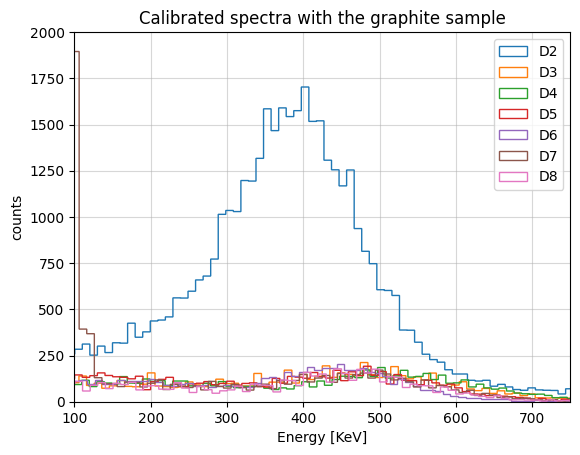

In [287]:
# plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label='D1')
plt.hist(gr_d2_def, bins=int(gr_d2_def.max()/10), histtype='step', label='D2')
plt.hist(gr_d3_def, bins=int(gr_d3_def.max()/10), histtype='step', label='D3')
plt.hist(gr_d4_def, bins=int(gr_d4_def.max()/10), histtype='step', label='D4')
plt.hist(gr_d5_def, bins=int(gr_d5_def.max()/10), histtype='step', label='D5')
plt.hist(gr_d6_def, bins=int(gr_d6_def.max()/10), histtype='step', label='D6')
plt.hist(gr_d7_def, bins=int(gr_d7_def.max()/10), histtype='step', label='D7')
plt.hist(gr_d8_def, bins=int(gr_d8_def.max()/10), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the graphite sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 2000)
plt.xlim(100, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_graphite.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [288]:
# fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/6), n=k)
fit_gr_d2 = bbb.normal(gr_d2_def, xmin=250, xmax=600, x1=0, x2=1000, b=int(gr_d2_def.max()/10), n=k)
fit_gr_d3 = bbb.normal(gr_d3_def, xmin=350, xmax=620, x1=0, x2=1000, b=int(gr_d3_def.max()/10), n=k)
fit_gr_d4 = bbb.normal(gr_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(gr_d4_def.max()/10), n=k)
fit_gr_d5 = bbb.normal(gr_d5_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(gr_d5_def.max()/10), n=k)
fit_gr_d6 = bbb.normal(gr_d6_def, xmin=350, xmax=550, x1=0, x2=1000, b=int(gr_d6_def.max()/10), n=k)
fit_gr_d7 = bbb.normal(gr_d7_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(gr_d7_def.max()/10), n=k)
fit_gr_d8 = bbb.normal(gr_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(gr_d8_def.max()/10), n=k)

#integrals dal det2 al det8
gr_int = np.array([fit_gr_d2[5][0], fit_gr_d3[5][0], fit_gr_d4[5][0], fit_gr_d5[5][0], fit_gr_d6[5][0], fit_gr_d7[5][0], fit_gr_d8[5][0]])
gr_int_err = np.array([fit_gr_d2[5][1], fit_gr_d3[5][1], fit_gr_d4[5][1], fit_gr_d5[5][1], fit_gr_d6[5][1], fit_gr_d7[5][1], fit_gr_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 353077.21879112284 ± 5559.966843154508
Media = 386.6811846625423 ± 1.560654475531641
Sigma = 89.76054062860328 ± 1.751007894318311
Chi-quadro = 191.19925874300915
Chi-quadro ridotto = 5.974976835719036
Integrale dell'istogramma nel range [207.16010340533575, 566.2022659197489] = 34638 ± 186
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 49093.04170139971 ± 4080.0098162686004
Media = 472.046654211206 ± 8.013709756225415
Sigma = 121.92303111876163 ± 13.08858044881327
Chi-quadro = 103.42586621363046
Chi-quadro ridotto = 4.137034648545218
Integrale dell'istogramma nel range [228.20059197368272, 715.8927164487293] = 5263 ± 72
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 40902.69209972543 ± 2538.2753668439623
Media = 514.7767853770462 ± 5.285782213552065
Sigma = 106.90535962863012 ± 8.621180653762652
Chi-quadro = 51.51238947637383
Chi-quadr

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\imaging\basicfunc.py:105: RuntimeWarning: divide by zero encountered in divide
  chi_quadro = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)


In [289]:
#CALCOLO COEFFICIENTE ATTENUAZIONE GRAFITE
rho_gr = 0.0017 #g/mm^3
mu_gr = -(np.log(gr_int/home_int))/(x_eff_graph*rho_al) #mm^2/g
mu_gr_err = 1/(x_eff_graph*rho_gr) * np.sqrt((gr_int_err/gr_int)**2 + (home_int_err/home_int)**2)

#compatibilità tra di loro
gr_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_gr)):
    for j in range(len(mu_gr)):
        if j == i:
            gr_compat_crossed[i, j] = ''
        else:
            gr_compat_crossed[i, j] = np.abs(mu_gr[i]-mu_gr[j])/np.sqrt(mu_gr_err[i]**2 + mu_gr_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(gr_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_gr = 8.715 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
gr_compat = np.abs(mu_gr-mu_atteso_gr)/mu_gr_err
print('\n')
for i in range(len(mu_gr)):
    if i == 0:
        print(f'mu{i+2} = {mu_gr[i]:.2f} ± {mu_gr_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {gr_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_gr[i]:.2f} ± {mu_gr_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {gr_compat[i]}')

print('\n')
for i in range(len(mu_gr)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_gr * mu_gr[i]:.4f} ± {10 * rho_gr * mu_gr_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_gr * mu_gr[i]:.4f} ± {10 * rho_gr * mu_gr_err[i]:.4f} cm^(-1)')


          d2        d3        d4        d5        d6        d7        d8
d2            3.224859  0.104019  2.217083  0.416613  0.040993  1.219732
d3  3.224859            2.183106  4.048276  2.538765  2.160707  3.143336
d4  0.104019  2.183106            1.718543  0.392552   0.04418  1.017529
d5  2.217083  4.048276  1.718543            1.278018  1.624807  0.606332
d6  0.416613  2.538765  0.392552  1.278018            0.338949  0.619916
d7  0.040993  2.160707   0.04418  1.624807  0.338949            0.949473
d8  1.219732  3.143336  1.017529  0.606332  0.619916  0.949473          


mu2 = 6.83 ± 0.19 mm^2/g 	 compatibilità con il valore atteso: 9.96449835240795
mu3 = 8.52 ± 0.49 mm^2/g 	 compatibilità con il valore atteso: 0.4071815291446502
mu4 = 6.89 ± 0.56 mm^2/g 	 compatibilità con il valore atteso: 3.2424684484264903
mu5 = 5.54 ± 0.55 mm^2/g 	 compatibilità con il valore atteso: 5.767804510808907
mu6 = 6.57 ± 0.59 mm^2/g 	 compatibilità con il valore atteso: 3.6271868900478723
mu7 = 6

In [290]:
#calcolo del coefficiente di attenuazione: MEDIA PESATA
somma_gr = 0
somma_gr_err = 0
for i in range(1, len(mu_gr)):
    somma_gr += mu_gr[i]/mu_gr_err[i]
    somma_gr_err +=1/mu_gr_err[i]

mu_gr_fin = somma_gr/somma_gr_err
mu_gr_err_fin = np.sqrt(1/somma_gr_err)

print(f'mu pesato grafite = {mu_gr_fin:.2f} più o meno {mu_gr_err_fin:.2f}')

mu pesato grafite = 6.79 più o meno 0.31


## finali

In [291]:
print(f'mu pesato piombo = \t{mu_pb_fin:.5f} \t {mu_pb_err_fin:.5f}')
print(f'mu pesato poliet = \t{mu_poly_fin:.5f} \t {mu_poly_err_fin:.5f}')
print(f'mu pesato ferroo = \t{mu_iron_fin:.5f} \t {mu_iron_err_fin:.5f}')
print(f'mu pesato allumi = \t{mu_al_fin:.5f} \t {mu_al_err_fin:.5f}')
print(f'mu pesato grafit = \t{mu_gr_fin:.5f} \t {mu_gr_err_fin:.5f}')

r_poly_true = np.abs(mu_poly_fin - mu_atteso_poly)/mu_poly_err_fin

r_poly_true


mu pesato piombo = 	15.47731 	 0.09304
mu pesato poliet = 	14.42338 	 0.26556
mu pesato ferroo = 	8.44774 	 0.21115
mu pesato allumi = 	7.85535 	 0.17844
mu pesato grafit = 	6.78650 	 0.30673


np.float64(18.87817585654261)

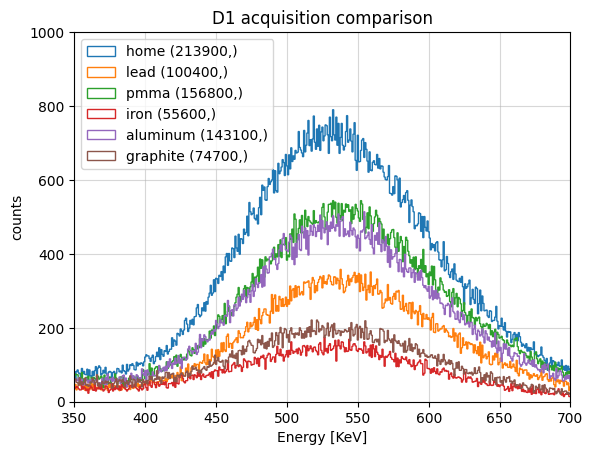

In [292]:
#confronto d1
plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label=f'home {hm_d1_def.shape}')
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label=f'lead {pb_d1_def.shape}')
plt.hist(poly_d1_def, bins=int(poly_d1.max()), histtype='step', label=f'pmma {poly_d1_def.shape}')
plt.hist(iron_d1_def, bins=int(iron_d1.max()), histtype='step', label=f'iron {iron_d1_def.shape}')
plt.hist(al_d1_def, bins=int(al_d1.max()), histtype='step', label=f'aluminum {al_d1_def.shape}')
plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label=f'graphite {gr_d1_def.shape}')
plt.title('D1 acquisition comparison')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.xlim(350, 700)
plt.ylim(0, 1000) 
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [293]:
print(hm_d1_def.shape) 
print(pb_d1_def.shape) 
print(poly_d1_def.shape)
print(iron_d1_def.shape)
print(al_d1_def.shape) 
print(gr_d1_def.shape)

(213900,)
(100400,)
(156800,)
(55600,)
(143100,)
(74700,)


# black box

In [294]:
#posizione 1
d2_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d3_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d4_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d5_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d6_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d7_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d8_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')

#posizione 2
d2_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d3_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d4_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d5_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d6_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d7_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d8_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')

#posizione 3
d2_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d3_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d4_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d5_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d6_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d7_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d8_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')

#posizione 4
d2_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d3_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d4_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d5_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d6_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d7_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d8_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')

#posizione 5
# d2_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d3_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d4_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d5_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d6_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d7_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d8_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')

In [295]:
#creazione array adc channels
d2_1 = np.asarray(d2_pos1['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_2 = np.asarray(d2_pos2['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_3 = np.asarray(d2_pos3['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_4 = np.asarray(d2_pos4['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
  
 
d3_1 = np.asarray(d3_pos1['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_2 = np.asarray(d3_pos2['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_3 = np.asarray(d3_pos3['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_4 = np.asarray(d3_pos4['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_box_calib = [d3_1, d3_2, d3_3, d3_4 ]  
 
d4_1 = np.asarray(d4_pos1['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_2 = np.asarray(d4_pos2['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_3 = np.asarray(d4_pos3['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_4 = np.asarray(d4_pos4['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_box_calib = [d4_1, d4_2, d4_3, d4_4 ]  
 
d5_1 = np.asarray(d5_pos1['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_2 = np.asarray(d5_pos2['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_3 = np.asarray(d5_pos3['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_4 = np.asarray(d5_pos4['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_box_calib = [d5_1, d5_2, d5_3, d5_4 ]  
 
d6_1 = np.asarray(d6_pos1['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_2 = np.asarray(d6_pos2['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_3 = np.asarray(d6_pos3['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_4 = np.asarray(d6_pos4['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_box_calib = [d6_1, d6_2, d6_3, d6_4 ]  
 
d7_1 = np.asarray(d7_pos1['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_2 = np.asarray(d7_pos2['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_3 = np.asarray(d7_pos3['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_4 = np.asarray(d7_pos4['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_box_calib = [d7_1, d7_2, d7_3, d7_4 ]  
 
d8_1 = np.asarray(d8_pos1['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_2 = np.asarray(d8_pos2['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_3 = np.asarray(d8_pos3['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_4 = np.asarray(d8_pos4['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_box_calib = [d8_1, d8_2, d8_3, d8_4]


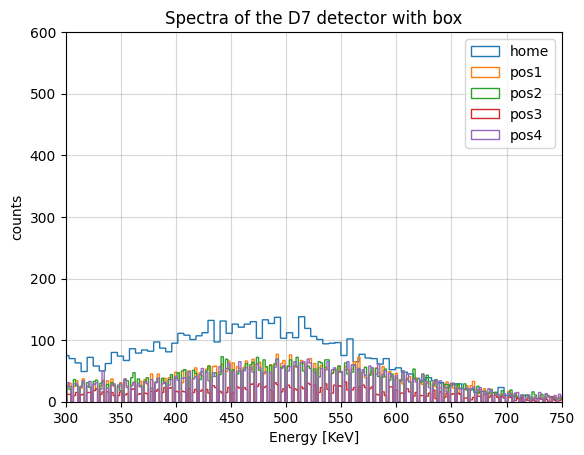

In [296]:
plt.hist(hm_d7_def, bins=int(hm_d7.max()/2), histtype='step', label='home')
plt.hist(d7_1, bins=int(d7_1.max()/2), histtype='step', label='pos1')
plt.hist(d7_2, bins=int(d7_2.max()/2), histtype='step', label='pos2')
plt.hist(d7_3, bins=int(d7_3.max()/2), histtype='step', label='pos3')
plt.hist(d7_4, bins=int(d7_4.max()/2), histtype='step', label='pos4')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectra of the D7 detector with box')
plt.ylim(0, 600)
plt.xlim(300, 750)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/d8_w_box.pdf')
plt.show()

In [297]:
d2_hm_com  = bbb.normal(hm_d2_def, b=int(hm_d2_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_1_fit = bbb.normal(d2_1, b=int(d2_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_2_fit = bbb.normal(d2_2, b=int(d2_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_3_fit = bbb.normal(d2_3, b=int(d2_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_4_fit = bbb.normal(d2_4, b=int(d2_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_box = np.array([2*d2_1_fit[5][0]/d2_hm_com[5][0], 2*d2_2_fit[5][0]/d2_hm_com[5][0], 2*d2_3_fit[5][0]/d2_hm_com[5][0], 2*d2_4_fit[5][0]/d2_hm_com[5][0]])

d3_hm_com  = bbb.normal(hm_d3_def, b=int(hm_d3_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_1_fit = bbb.normal(d3_1, b=int(d3_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_2_fit = bbb.normal(d3_2, b=int(d3_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_3_fit = bbb.normal(d3_3, b=int(d3_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_4_fit = bbb.normal(d3_4, b=int(d3_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_box = np.array([2*d3_1_fit[5][0]/d3_hm_com[5][0], 2*d3_2_fit[5][0]/d3_hm_com[5][0], 2*d3_3_fit[5][0]/d3_hm_com[5][0], 2*d3_4_fit[5][0]/d3_hm_com[5][0]])

d4_hm_com  = bbb.normal(hm_d4_def, b=int(hm_d4_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_1_fit = bbb.normal(d4_1, b=int(d4_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_2_fit = bbb.normal(d4_2, b=int(d4_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_3_fit = bbb.normal(d4_3, b=int(d4_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_4_fit = bbb.normal(d4_4, b=int(d4_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_box = np.array([2*d4_1_fit[5][0]/d4_hm_com[5][0], 2*d4_2_fit[5][0]/d4_hm_com[5][0], 2*d4_3_fit[5][0]/d4_hm_com[5][0], 2*d4_4_fit[5][0]/d4_hm_com[5][0]])

d5_hm_com  = bbb.normal(hm_d5_def, b=int(hm_d5_def.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_1_fit = bbb.normal(d5_1, b=int(d5_1.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_2_fit = bbb.normal(d5_2, b=int(d5_2.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_3_fit = bbb.normal(d5_3, b=int(d5_3.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_4_fit = bbb.normal(d5_4, b=int(d5_4.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_box = np.array([2*d5_1_fit[5][0]/d5_hm_com[5][0], 2*d5_2_fit[5][0]/d5_hm_com[5][0], 2*d5_3_fit[5][0]/d5_hm_com[5][0], 2*d5_4_fit[5][0]/d5_hm_com[5][0]])

d6_hm_com  = bbb.normal(hm_d6_def, b=int(hm_d6_def.max()/10), xmin=350, xmax=550, x1=400, x2=700, n=k)
d6_1_fit = bbb.normal(d6_1, b=int(d6_1.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_2_fit = bbb.normal(d6_2, b=int(d6_2.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_3_fit = bbb.normal(d6_3, b=int(d6_3.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_4_fit = bbb.normal(d6_4, b=int(d6_4.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_box = np.array([2*d6_1_fit[5][0]/d6_hm_com[5][0], 2*d6_2_fit[5][0]/d6_hm_com[5][0], 2*d6_3_fit[5][0]/d6_hm_com[5][0], 2*d6_4_fit[5][0]/d6_hm_com[5][0]])

d7_hm_com  = bbb.normal(hm_d7_def, b=int(hm_d7_def.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_1_fit = bbb.normal(d7_1, b=int(d7_1.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_2_fit = bbb.normal(d7_2, b=int(d7_2.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_3_fit = bbb.normal(d7_3, b=int(d7_3.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_4_fit = bbb.normal(d7_4, b=int(d7_4.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_box = np.array([2*d7_1_fit[5][0]/d7_hm_com[5][0], 2*d7_2_fit[5][0]/d7_hm_com[5][0], 2*d7_3_fit[5][0]/d7_hm_com[5][0], 2*d7_4_fit[5][0]/d7_hm_com[5][0]])

d8_hm_com  = bbb.normal(hm_d8_def, b=int(hm_d8_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_1_fit = bbb.normal(d8_1, b=int(d8_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_2_fit = bbb.normal(d8_2, b=int(d8_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_3_fit = bbb.normal(d8_3, b=int(d8_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_4_fit = bbb.normal(d8_4, b=int(d8_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_box = np.array([2*d8_1_fit[5][0]/d8_hm_com[5][0], 2*d8_2_fit[5][0]/d8_hm_com[5][0], 2*d8_3_fit[5][0]/d8_hm_com[5][0], 2*d8_4_fit[5][0]/d8_hm_com[5][0]])


Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 706766.1996212135 ± 120256.67786402236
Media = 358.98545306102767 ± 19.393923873238972
Sigma = 104.5864065754756 ± 9.41377162066372
Chi-quadro = 111.11303429865305
Chi-quadro ridotto = 6.536060841097238
Integrale dell'istogramma nel range [149.81263991007646, 568.1582662119789] = 54265 ± 232
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 15278.362749529768 ± 1187.0985153808613
Media = 464.7584852342823 ± 6.457409027453029
Sigma = 94.33606783037172 ± 8.574096391194564
Chi-quadro = 16.470331738079047
Chi-quadro ridotto = 0.9688430434164145
Integrale dell'istogramma nel range [276.0863495735389, 653.4306208950258] = 1713 ± 41
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 14862.32251132523 ± 914.8790095722521
Media = 486.86032429528166 ± 4.296455295814701
Sigma = 80.83522520352015 ± 6.451272495829753
Chi-quadro = 18.64224270274135
Chi-quad

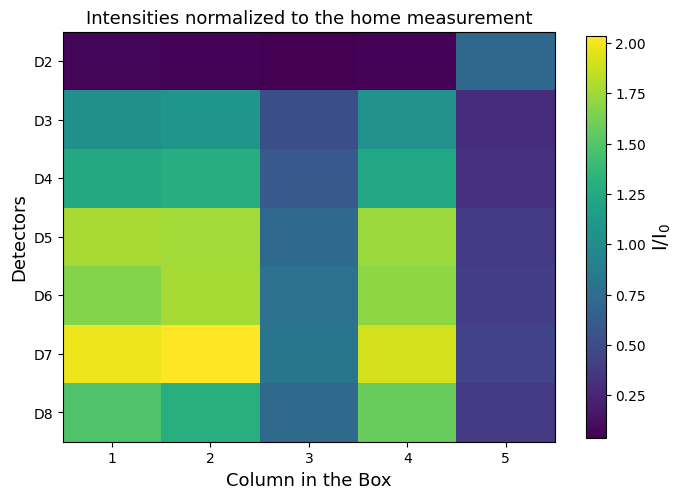

In [298]:
box2 = np.append(d2_box, 0.71)
box3 = np.append(d3_box, 0.3)
box4 = np.append(d4_box, 0.31)
box5 = np.append(d5_box, 0.38)
box6 = np.append(d6_box, 0.4)
box7 = np.append(d7_box, 0.44)
box8 = np.append(d8_box, 0.38)
data = np.array([box2, box3, box4, box5, box6, box7, box8])

# Dimensioni in cm per pixel
pixel_height_cm = 1.5
pixel_width_cm = 1.8

# Calcola il rapporto altezza/larghezza dei pixel
aspect_ratio = (pixel_height_cm / pixel_width_cm) * (data.shape[1] / data.shape[0])

# Crea la figura
plt.figure(figsize=(7, 7))
im = plt.imshow(data, cmap='viridis', aspect=aspect_ratio)

# Aggiungi etichette agli assi
plt.xlabel('Column in the Box', fontsize=13)
plt.ylabel('Detectors', fontsize=13)
plt.title('Intensities normalized to the home measurement', fontsize=13)

# Aggiungi i nomi dei detector (da D2 a D8)
plt.yticks(ticks=np.arange(7), labels=[f'D{i}' for i in range(2, 9)])
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5])

# Aggiungi una barra di colore con altezza uguale al grafico
cbar = plt.colorbar(im, shrink=0.6)  # Imposta shrink per adattare l'altezza
cbar.set_label(r'I/I$_0$', fontsize=14)
cbar.ax.tick_params(labelsize=10)

# Mostra il grafico
plt.tight_layout()
plt.savefig('grafici/balckbox.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [299]:
d2_err = np.array([
    2/d2_hm_com[5][0] * np.sqrt(d2_1_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2),
    2/d2_hm_com[5][0] * np.sqrt(d2_2_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2),
    2/d2_hm_com[5][0] * np.sqrt(d2_3_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2),
    2/d2_hm_com[5][0] * np.sqrt(d2_4_fit[5][1]**2 + (d2_hm_com[5][1]/d2_hm_com[5][0])**2)
])

d3_err = np.array([
    2/d3_hm_com[5][0] * np.sqrt(d3_1_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2),
    2/d3_hm_com[5][0] * np.sqrt(d3_2_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2),
    2/d3_hm_com[5][0] * np.sqrt(d3_3_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2),
    2/d3_hm_com[5][0] * np.sqrt(d3_4_fit[5][1]**2 + (d3_hm_com[5][1]/d3_hm_com[5][0])**2)
])

d4_err = np.array([
    2/d4_hm_com[5][0] * np.sqrt(d4_1_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2),
    2/d4_hm_com[5][0] * np.sqrt(d4_2_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2),
    2/d4_hm_com[5][0] * np.sqrt(d4_3_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2),
    2/d4_hm_com[5][0] * np.sqrt(d4_4_fit[5][1]**2 + (d4_hm_com[5][1]/d4_hm_com[5][0])**2)
])

d5_err = np.array([
    2/d5_hm_com[5][0] * np.sqrt(d5_1_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2),
    2/d5_hm_com[5][0] * np.sqrt(d5_2_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2),
    2/d5_hm_com[5][0] * np.sqrt(d5_3_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2),
    2/d5_hm_com[5][0] * np.sqrt(d5_4_fit[5][1]**2 + (d5_hm_com[5][1]/d5_hm_com[5][0])**2)
])

d6_err = np.array([
    2/d6_hm_com[5][0] * np.sqrt(d6_1_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2),
    2/d6_hm_com[5][0] * np.sqrt(d6_2_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2),
    2/d6_hm_com[5][0] * np.sqrt(d6_3_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2),
    2/d6_hm_com[5][0] * np.sqrt(d6_4_fit[5][1]**2 + (d6_hm_com[5][1]/d6_hm_com[5][0])**2)
])

d7_err = np.array([
    2/d7_hm_com[5][0] * np.sqrt(d7_1_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2),
    2/d7_hm_com[5][0] * np.sqrt(d7_2_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2),
    2/d7_hm_com[5][0] * np.sqrt(d7_3_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2),
    2/d7_hm_com[5][0] * np.sqrt(d7_4_fit[5][1]**2 + (d7_hm_com[5][1]/d7_hm_com[5][0])**2)
])

d8_err = np.array([
    2/d8_hm_com[5][0] * np.sqrt(d8_1_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2),
    2/d8_hm_com[5][0] * np.sqrt(d8_2_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2),
    2/d8_hm_com[5][0] * np.sqrt(d8_3_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2),
    2/d8_hm_com[5][0] * np.sqrt(d8_4_fit[5][1]**2 + (d8_hm_com[5][1]/d8_hm_com[5][0])**2)
])

box2_err = np.append(d2_err, d2_err[0])
box3_err = np.append(d3_err, d3_err[0])
box4_err = np.append(d4_err, d4_err[0])
box5_err = np.append(d5_err, d5_err[0])
box6_err = np.append(d6_err, d6_err[0])
box7_err = np.append(d7_err, d7_err[0])
box8_err = np.append(d8_err, d8_err[0])
data_err = np.array([box3_err, box4_err, box5_err, box6_err, box7_err, box8_err]) 

In [300]:
l = 250 #mm
h = 15 #mm
g = 5 #mm
sbb = np.array([4*g+7*h/2, 3*g+5*h/2, 2*g+3*h/2, g+h/2, -h/2, -g-3*h/2]) #allineamento a d7
thetabb_max = []
thetabb_min = []
for i in range(len(sbb)):
    thetabb_max.append(np.arctan((sbb[i]+h)/l))
    thetabb_min.append(np.arctan(sbb[i]/l))
thetabb_max = np.array(thetabb_max)
thetabb_min = np.array(thetabb_min)
coseno = 1/(2*(thetabb_max-thetabb_min))*(np.log((1+np.sin(thetabb_max))/(1-np.sin(thetabb_max)))-np.log((1+np.sin(thetabb_min))/(1-np.sin(thetabb_min))))

#escludendo d2 che ha evidenti problemi calcoliamo mu di quello che c'è dentro la black box
box_ii0 = np.array([box3[2], box4[2], box5[2], box6[2], box7[2], box8[2]])
err_ii0 = np.array([box3_err[2], box4_err[2], box5_err[2], box6_err[2], box7_err[2], box8_err[2]])

mu_per_xeff = -np.log(box_ii0)
mu_per_xeff_err = 1/box_ii0 * err_ii0




In [301]:
# Definizione dei materiali con slicing per escludere il primo dato
materials = {
    "piombo": {"mu": mu_pb[1:], "rho": rho_pb, "mu_err": mu_pb_err[1:]},
    "alluminio": {"mu": mu_al[1:], "rho": rho_al, "mu_err": mu_al_err[1:]},
    "ferro": {"mu": mu_iron[1:], "rho": rho_iron, "mu_err": mu_iron_err[1:]},
    "grafite": {"mu": mu_gr[1:], "rho": rho_gr, "mu_err": mu_gr_err[1:]},
    "polietilene": {"mu": mu_poly[1:], "rho": rho_poly, "mu_err": mu_poly_err[1:]},
}

xbb = {}
xbb_err = {}

# Calcolo di xbb e xbb_err per ogni materiale
for materiale, props in materials.items():
    mu = props["mu"]
    rho = props["rho"]
    mu_err = props["mu_err"]
    
    xbb[materiale] = mu_per_xeff * coseno / (mu * rho)
    xbb_err[materiale] = coseno / (rho * mu) * np.sqrt(mu_per_xeff_err**2 + (mu_err / mu)**2)

# Funzione per calcolare la media pesata e la sua incertezza
def media_pesata(valori, incertezze):
    somma_valori = np.sum(valori / incertezze**2)
    somma_incertezze = np.sum(1 / incertezze**2)
    media = somma_valori / somma_incertezze
    errore_media = np.sqrt(1 / somma_incertezze)
    return media, errore_media

# Calcolo della media pesata per ciascun materiale
for materiale in materials.keys():
    valori = xbb[materiale]
    incertezze = xbb_err[materiale]
    media, errore = media_pesata(valori, incertezze)
    print(f"Media pesata x0 per {materiale} = {media} ± {errore}")



Media pesata x0 per piombo = 2.05028990317674 ± 0.06089512532042728
Media pesata x0 per alluminio = 16.67192087845089 ± 0.6266153288237405
Media pesata x0 per ferro = 5.8776676582734595 ± 0.23707156049707792
Media pesata x0 per grafite = 37.22503639299044 ± 2.910769467271349
Media pesata x0 per polietilene = 19.833695496332574 ± 0.8535774788948188
